In [ ]:
# Importing necessary libraries
import keras
import tensorflow
from skimage import io
import os
import glob
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import os
from pathlib import Path

In [ ]:
data_path = Path('drive/MyDrive/Deep-Learning-Project/Data/raw/color')

In [ ]:
dir = [os.fspath(f) for f in data_path.iterdir() if f.is_dir()]

In [ ]:
img_classes = [x.split('/')[-1] for x in dir]

In [ ]:
import numpy as np

In [ ]:
np_img_classes = np.array(img_classes)

In [ ]:
np_img_classes.shape

(38,)

In [ ]:
np_img_classes[0]

'Corn_(maize)___Common_rust_'

In [ ]:
healthy_classes = [y for y in img_classes if y.find('healthy') != -1]
unhealthy_classes = [z for z in img_classes if z.find('healthy') == -1]

In [ ]:
unhealthy_classes


['Corn_(maize)___Common_rust_',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Potato___Early_blight',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___Esca_(Black_Measles)',
 'Strawberry___Leaf_scorch',
 'Grape___Black_rot',
 'Tomato___Leaf_Mold',
 'Peach___Bacterial_spot',
 'Apple___Cedar_apple_rust',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Potato___Late_blight',
 'Tomato___Bacterial_spot',
 'Pepper,_bell___Bacterial_spot',
 'Apple___Apple_scab',
 'Tomato___Septoria_leaf_spot',
 'Cherry_(including_sour)___Powdery_mildew',
 'Tomato___Target_Spot',
 'Squash___Powdery_mildew',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___Late_blight',
 'Tomato___Early_blight',
 'Apple___Black_rot']

In [ ]:
!cd drive/MyDrive/Deep-Learning-Project/

In [ ]:
data_path = "/content/drive/MyDrive/Deep-Learning-Project/Data/raw/color/"

In [ ]:
all_directories = !ls /content/drive/MyDrive/Deep-Learning-Project/Data/raw/color/

In [ ]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk(data_path):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath.split('/')[-1]}'.")


There are 38 directories and 0 images in ''.
There are 0 directories and 1192 images in 'Corn_(maize)___Common_rust_'.
There are 0 directories and 1674 images in 'Tomato___Spider_mites Two-spotted_spider_mite'.
There are 0 directories and 1591 images in 'Tomato___healthy'.
There are 0 directories and 985 images in 'Corn_(maize)___Northern_Leaf_Blight'.
There are 0 directories and 1478 images in 'Pepper,_bell___healthy'.
There are 0 directories and 1000 images in 'Potato___Early_blight'.
There are 0 directories and 5090 images in 'Soybean___healthy'.
There are 0 directories and 1076 images in 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)'.
There are 0 directories and 1383 images in 'Grape___Esca_(Black_Measles)'.
There are 0 directories and 1109 images in 'Strawberry___Leaf_scorch'.
There are 0 directories and 1502 images in 'Blueberry___healthy'.
There are 0 directories and 1180 images in 'Grape___Black_rot'.
There are 0 directories and 952 images in 'Tomato___Leaf_Mold'.
There are 0 dir

In [ ]:
data_dir = Path(data_path)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))

In [ ]:
class_names

array(['Apple___Apple_scab', 'Apple___Black_rot',
       'Apple___Cedar_apple_rust', 'Apple___healthy',
       'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew',
       'Cherry_(including_sour)___healthy',
       'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
       'Corn_(maize)___Common_rust_',
       'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy',
       'Grape___Black_rot', 'Grape___Esca_(Black_Measles)',
       'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy',
       'Orange___Haunglongbing_(Citrus_greening)',
       'Peach___Bacterial_spot', 'Peach___healthy',
       'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy',
       'Potato___Early_blight', 'Potato___Late_blight',
       'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy',
       'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch',
       'Strawberry___healthy', 'Tomato___Bacterial_spot',
       'Tomato___Early_blight', 'Tomato___Late_blight',
   

In [ ]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (256, 256, 3)


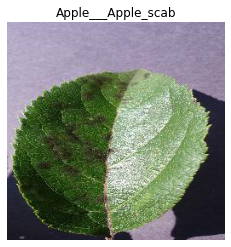

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir= data_path,
                        target_class="Apple___Apple_scab")

In [ ]:
img

array([[[173, 164, 195],
        [175, 166, 197],
        [179, 170, 201],
        ...,
        [141, 130, 162],
        [138, 127, 159],
        [138, 127, 159]],

       [[173, 164, 195],
        [174, 165, 196],
        [176, 167, 198],
        ...,
        [139, 128, 160],
        [135, 124, 156],
        [134, 123, 155]],

       [[179, 170, 201],
        [179, 170, 201],
        [178, 169, 200],
        ...,
        [139, 128, 160],
        [136, 125, 157],
        [136, 125, 157]],

       ...,

       [[ 27,  27,  37],
        [ 27,  27,  37],
        [ 27,  27,  37],
        ...,
        [160, 141, 163],
        [155, 136, 158],
        [157, 138, 160]],

       [[ 25,  25,  35],
        [ 25,  25,  35],
        [ 25,  25,  35],
        ...,
        [150, 128, 151],
        [124, 102, 125],
        [116,  94, 117]],

       [[ 23,  23,  33],
        [ 23,  23,  33],
        [ 23,  23,  33],
        ...,
        [152, 130, 153],
        [137, 115, 138],
        [140, 118, 141]]

In [ ]:
img.shape

(256, 256, 3)

In [ ]:
img/255

array([[[0.67843137, 0.64313725, 0.76470588],
        [0.68627451, 0.65098039, 0.77254902],
        [0.70196078, 0.66666667, 0.78823529],
        ...,
        [0.55294118, 0.50980392, 0.63529412],
        [0.54117647, 0.49803922, 0.62352941],
        [0.54117647, 0.49803922, 0.62352941]],

       [[0.67843137, 0.64313725, 0.76470588],
        [0.68235294, 0.64705882, 0.76862745],
        [0.69019608, 0.65490196, 0.77647059],
        ...,
        [0.54509804, 0.50196078, 0.62745098],
        [0.52941176, 0.48627451, 0.61176471],
        [0.5254902 , 0.48235294, 0.60784314]],

       [[0.70196078, 0.66666667, 0.78823529],
        [0.70196078, 0.66666667, 0.78823529],
        [0.69803922, 0.6627451 , 0.78431373],
        ...,
        [0.54509804, 0.50196078, 0.62745098],
        [0.53333333, 0.49019608, 0.61568627],
        [0.53333333, 0.49019608, 0.61568627]],

       ...,

       [[0.10588235, 0.10588235, 0.14509804],
        [0.10588235, 0.10588235, 0.14509804],
        [0.10588235, 0